# Data Visualization (part 2)

## Seaborn

> Seaborn is a visualization library based on matplotlib. It provides a higher-level interface for drawing statistical graphs. It also supports data structures from numpy and pandas and statistical routines from scipy.

As we saw, matplotlib does has a lot of options, but it can be rather hard to make its figures aesthetically pleasing. Seaborn's goal is to fill that gap and produce figures much easier than with matplotlib.

Similar to matplotlib's styles, in seaborn we can also set all the aesthetic parameters in one step. This is done by the `seaborn.set(...)`.

### Visualizing the distribution of a variable

This can be achieved through a **distribution plot**

These plots can be useful for visualizing the distribution of a continuous variable.

```python3
sns.distplot(x)
```

where `x` is a sequence of samples of a continuous-valued variable. If `x` is a pandas Series with a `name` attribute, then the name will be used to label the axis. [`sns.distplot`](https://seaborn.pydata.org/generated/seaborn.distplot.html) can internally calculate the optimal size of the bins with the [Freedman–Diaconis rule](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule). Obviously, we can select our own bins through the `bins` argument.

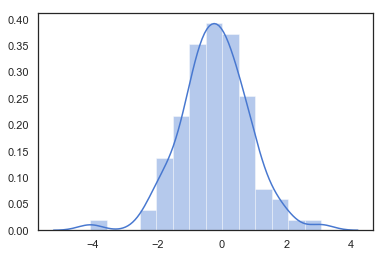

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="white", palette="muted", color_codes=True)  # sets aesthetic parameters

d = np.random.normal(size=100)  # random normal 

sns.distplot(d)  # plot the distribution of d

Notice how we produced a rather complex graph in just one line! In order to produce the same through matplotlib we would need to first bin the data, draw a barplot, customize it so that the bars are closer and have the same color and finally calculate and draw the thick line on top. But what is this line?

By default `sns.distplot()` will draw a histogram and fit a [Kernel Density Estimation (KDE)](https://en.wikipedia.org/wiki/Kernel_density_estimation). This is a non-parametric way to predict the probability density function of a random variable. The KDE can be removed by setting the parameter `kde=False`.

Seaborn has a [great tutorial](https://seaborn.pydata.org/tutorial/distributions.html) exploring the different options when visualizing variable distributions.

Because seaborn is built on top of matplotlib, we can further customize the plot in any way we want. It can accept an *axes* object (parameter `ax`) and draw the plot on that object. This is useful for placing it in a subplot, wherever we want. It returns the same *axes* object with drawn plot. If no *axes* is passed, like before, it will produce one on its own.

Text(-1,0.1,'added\n  text')

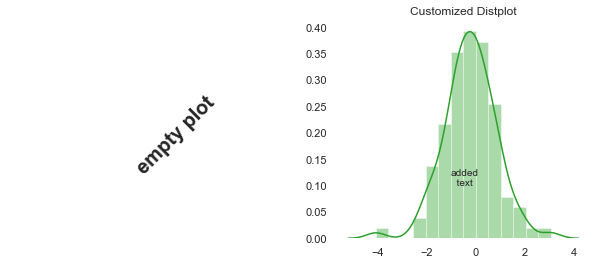

In [2]:
# We want to create two subplots and place it on the right one
f = plt.figure(figsize=(10, 4))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)  

# Write something on the left subplot
ax1.text(0.4, 0.6, 'empty plot', rotation=45, size=20, weight='bold')
ax1.axis('off')

# Draw the distplot and retrieve its 'axes' object
ax2 = sns.distplot(d, color='#2ca02c', ax=ax2)

# Customize the 'axes' object any way we want
ax2.set_title('Customized Distplot')
ax2.set_xlabel('$x$')
ax2.set_xlabel('')
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

# Add more elements to the distplot
ax2.text(-1, 0.1, 'added\n  text')

### Visualizing the relationship among two continuous variables

The easiest way to do this is through a **regression plot**.

This type of plot scatters the data points and **fits a linear regression** model to it.

```python
sns.regplot(x, y, data=None)
```

There are two ways to draw a regplot:

1. The regular way of using `x` and `y`, two sequences containing the $x$ and $y$ coordinates of the data points.

2. By using a pandas DataFrame. In this case the DataFrame should be passed as the `data` argument and should contain two columns with the $x$ and $y$ coordinates of the data points. The names of these two columns are passed as strings to the `x` and `y`.

Seaborn **synergizes** well with DataFrames, so the second way is recommended.

Most of the other parameters regulate the functionality of the estimator performing the fit. An important parameter is `ax`, which works like we saw in the previous plot. A list of all available parameters can be found [here](https://seaborn.pydata.org/generated/seaborn.regplot.html). 

We'll create two regplots, one with the first way and one with the second.

Text(0.5,1,'Second way')

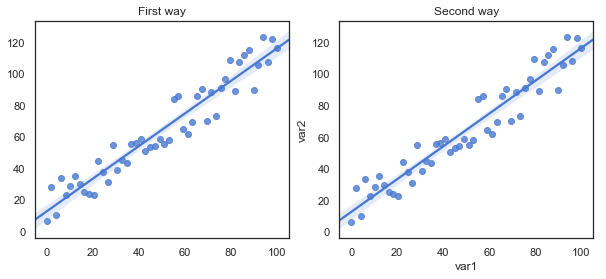

In [3]:
# Create new x and y data
np.random.seed(5)
x = np.linspace(0, 100, 50)
y = x + np.random.random(50) * 30

# Store these two in a DataFrame
df = pd.DataFrame({'var1': x, 'var2': y})

plt.figure(figsize=(10, 4))

# Draw first figure
ax = plt.subplot(121)
ax = sns.regplot(x, y, ax=ax)
ax.set_title('First way')

# Draw second figure
ax = plt.subplot(122)
ax = sns.regplot(x='var1', y='var2', data=df, ax=ax)
ax.set_title('Second way')

These two ways produced identical plots, with the only difference that the second took the liberty of naming the axes with the column names from the DataFrame.

In the figures above the blue dots are the **data points** contained in the two variables. The blue line is the **linear regression** line, while the shaded light blue area is the **confidence interval**, currently at 95%.

The regression model doesn't even have to be linear. We can use a polynomial regression to model the data. 

Text(0.5,1,'Polynomial Regression')

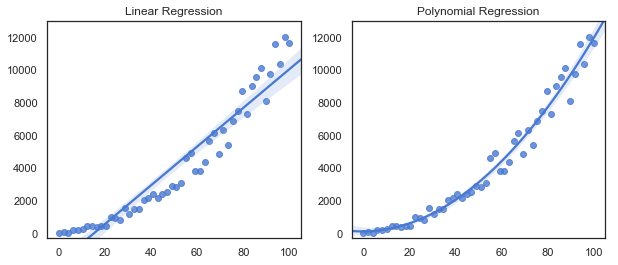

In [4]:
plt.figure(figsize=(10, 4))

# Draw first figure
ax = plt.subplot(121)
ax = sns.regplot(x, x*y, ax=ax)
ax.set_ylim([-300, 13000])
ax.set_title('Linear Regression')

# Draw second figure
ax = plt.subplot(122)
ax = sns.regplot(x, x*y, order=2, ax=ax)
ax.set_ylim([-300, 13000])
ax.set_title('Polynomial Regression')

If the data contains outliers we can use the `robust=True` parameter, which makes the regression more robust to outliers. This requires the *statsmodels* package to be installed. 

Text(0.5,1,'Robust Regression')

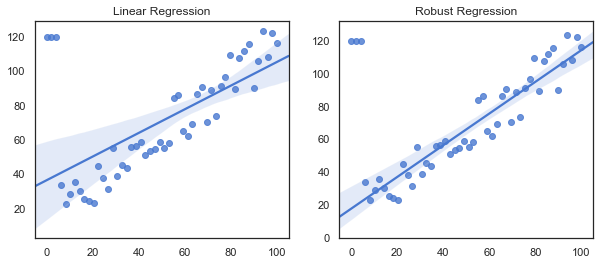

In [5]:
# Make a few outliers
y2 = y.copy()
y2[0] = 120
y2[1] = 120
y2[2] = 120

plt.figure(figsize=(10, 4))

# Draw first figure
ax = plt.subplot(121)
ax = sns.regplot(x, y2, ax=ax)
ax.set_title('Linear Regression')

# Draw second figure
ax = plt.subplot(122)
ax = sns.regplot(x, y2, robust=True, ax=ax)
ax.set_title('Robust Regression')

### lmplot

Another way to draw regression plots is through [`sns.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html). This plot works similar to `sns.regplot` in how its created. 

These plots work best with DataFrames and have the capability of **subsetting** the data according to a **condition** and plotting separate regressions on each subset. This is done by passing the variable which will partition the data into the `hue` argument.

If more than one conditions are present, it can draw the subsets of the second and third condition on separate subplots by passing the variables containing the conditions into the `row` and `col` arguments.

One big difference is that `sns.lmplot` **doesn't accept or return** *axes* objects. It creates its own subplots instead, however there **is** a way of accessing the *axes* objects it created. 

(-300, 13000)

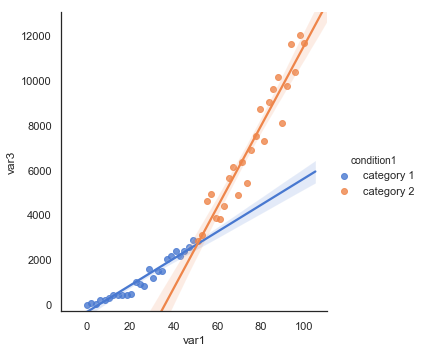

In [6]:
# Add two new columns to the DataFrame.
df['var3'] = x * y  # add variable we used in the previous example
df['condition1'] = ['category 1'] * 25 + ['category 2'] * 25  # condition 

lm = sns.lmplot(x='var1', y='var3', hue='condition1', data=df)  # draw the plot with the condition
ax = lm.axes  # retrieve an array containing the 'axes' objects (in this case there is only one)
ax[0, 0].set_ylim([-300, 13000])  # use the 'axes' object to customize the plot

As mentioned previously, we can subset the data using more than one conditions. Let's create a new dataset to illustrate this.

In [7]:
# Create the new DataFrame
df2 = pd.DataFrame({'x': np.r_[x, x + 0.33, x + 0.66],
                    'y': np.r_[y, x * y, y * (x-(x/10) ** 2)],
                    'cat': ['y'] * 50 + ['x * y'] * 50 + ['y*(x-(x/10)**2)'] * 50,
                    'h': (['low'] * 25 + ['high'] * 25) * 3})

# Print 5 random rows from the DataFrame
df2.sample(5)

,cat,h,x,y
138,y*(x-(x/10)**2),high,78.211020,1684.271472
95,x * y,high,92.166735,9727.474210
37,y,high,75.510204,90.974382
53,x * y,low,6.452449,206.208834
86,x * y,high,73.799388,5401.370420


To visualize the results let's first draw a `sns.lmplot` without any subsetting.

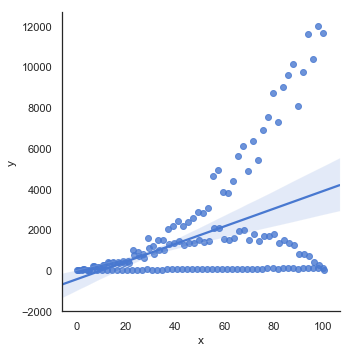

In [8]:
sns.lmplot('x', 'y', data=df2)

Now, subset the data according to two conditions. 

(-300, 13000)

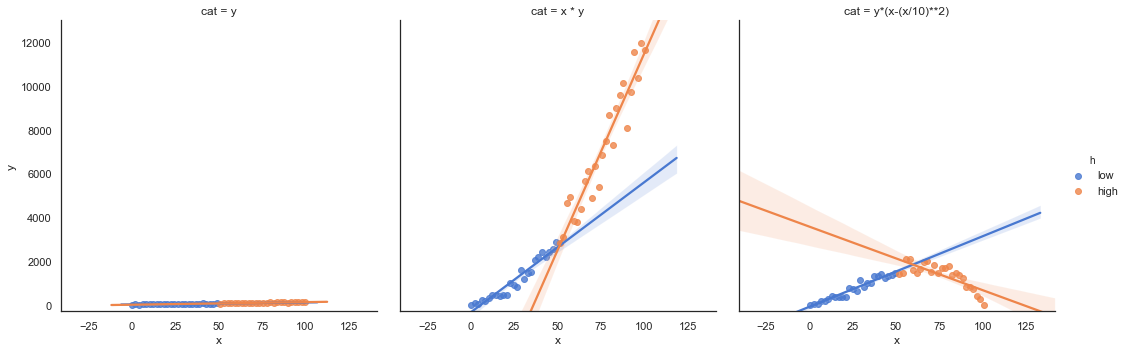

In [9]:
sns.lmplot('x', 'y', hue='h', col='cat', data=df2)
plt.ylim([-300, 13000])

### Visualizing the relationship between a continuous (dependent) and a discrete (independent) variable

If the discrete variable is **ordinal**, we can visualize a linear relationship like we did before.

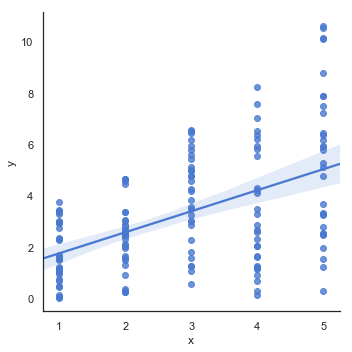

In [10]:
np.random.seed(50)
df3 = pd.DataFrame({'x': [1] * 15 + [2] * 15 + [3] * 15 + [4] * 15 + [5] * 15 +   
                         [1] * 15 + [2] * 15 + [3] * 15 + [4] * 15 + [5] * 15,      # ordinal variable
                    'y': np.r_[np.random.random(15) * 3, np.random.random(15) * 5,  # continuous variable
                               np.random.random(15) * 7, np.random.random(15) * 9,
                               np.random.random(15) * 11, 
                               np.random.random(15) * 4, np.random.random(15) * 5,
                               np.random.random(15) * 6, np.random.random(15) * 7,
                               np.random.random(15) * 8],
                    'cond': ['A'] * 75 + ['B'] * 75})                     

sns.lmplot(x='x', y='y', data=df3)

Another option is to collapse the samples in each discrete bin over their mean.

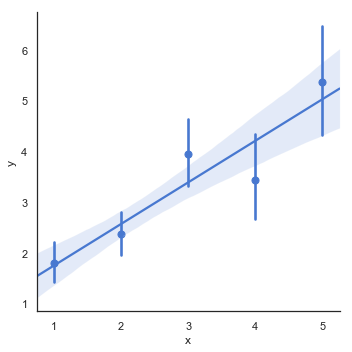

In [11]:
sns.lmplot(x='x', y='y', data=df3, x_estimator=np.mean)

An advantage of using `sns.lmplot` is that we can partition the data like we saw previously.

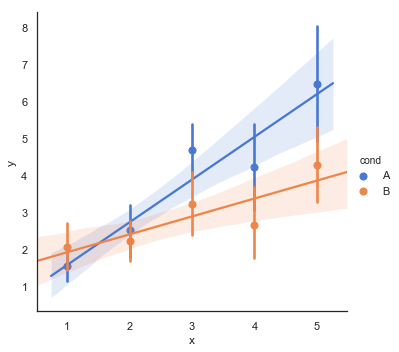

In [12]:
sns.lmplot(x='x', y='y', hue='cond', data=df3, x_estimator=np.mean)

A nice tutorial on visualizing linear relationships in seaborn can be found [here](https://seaborn.pydata.org/tutorial/regression.html#regression-tutorial). 

Another way of visualizing relationships between discrete and continuous variables is through barplots. Barplots can be used with both **ordinal** and **categorical** discrete variables. Seaborn has its own way of creating barplots, through [`sns.barplot`](https://seaborn.pydata.org/generated/seaborn.barplot.html).

```python
ax = sns.barplot(x, y, data=None)
```

Like we saw in the previous seaborn functions, there are two ways to draw barplots. Either `x` and `y` sequences containing the relevant data or they are the names of the columns in a DataFrame containing the same; the second way is recommended.

Seaborn barplots can subset the data like we saw with the `sns.lmplot` before. However, seaborn barplots **can** accept and return matplotlib *axes* objects.

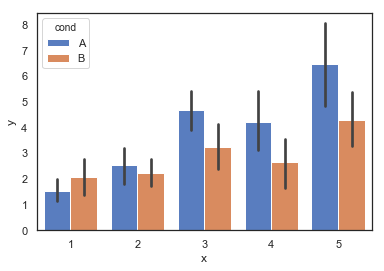

In [13]:
sns.barplot(x='x', y='y', hue='cond', data=df3)

The above barplot shows the *mean* $y$ for each category in $x$, partitioned by `cond`. The black lines represent the **confidence interval** of each category, currently set to 95% of the observations.

We can change the **estimator** (i.e. the function that maps the values of each bin to a single value; currently `np.mean`) if we want. We are going to make it so that the $y$ axis represents the *sum* of all values in a bin, instead of the *mean*.

We'll also change the colors of the bars by changing the **[color palette](https://seaborn.pydata.org/tutorial/color_palettes.html)** and **saturation** of the colors.

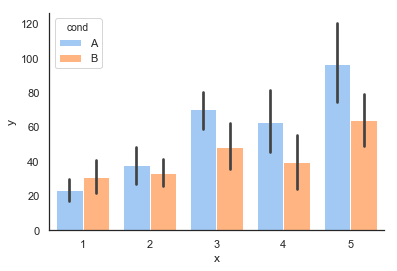

In [14]:
ax = sns.barplot(x='x', y='y', hue='cond', palette='pastel', saturation=1, estimator=np.sum, data=df3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

There are two more plots we can use to visualize the same information: **boxplots** and **violinplots**. Besides the relationship visible through the barplot, both boxplots and violinplots also convey information about the **distribution** of data in each category. 

```python
sns.boxplot(x, y, data=None)

sns.violinplot(x, y, data=None)
```

Both can be drawn like any other seaborn plot we previously saw. 

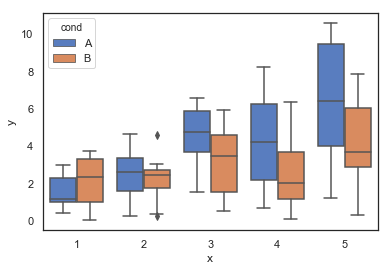

In [15]:
sns.boxplot(x='x', y='y', hue='cond', data=df3)

Boxplots display four types of information:

- The subset's **median**, shown by the horizontal line in the middle of each box.
- Each box spans the **[Interquantile Range](https://en.wikipedia.org/wiki/Interquartile_range)** ($IQR$) of its corresponding subset's distribution.
- The *whiskers* extend to points that lie within $1.5 \times IQR$ of the lower and upper quartile.
- Any samples **not** falling in the above range are displayed **individually** (as we can see happens above in `x=2` and `cond=B`). 

The range that a boxplot spans is depicted in the image below:

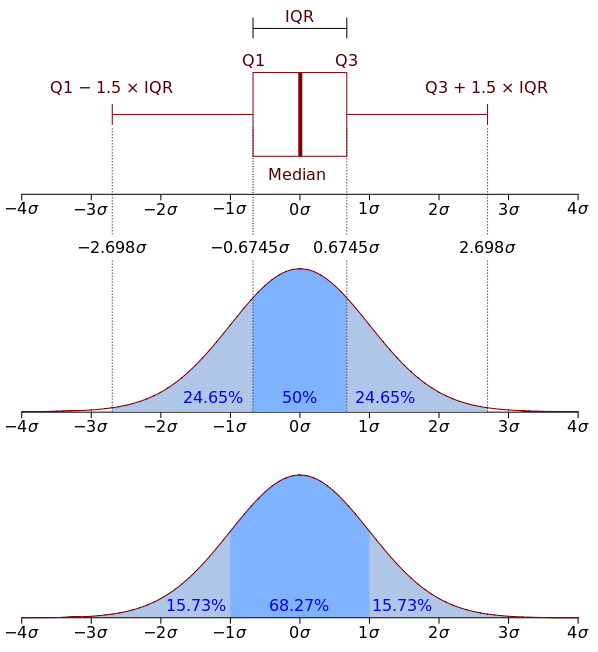

The documentation of `sns.boxplot` can be found [here](https://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Violinplots are more complex plots as they combine a boxplot with a KDE of the distribution of each subset.  

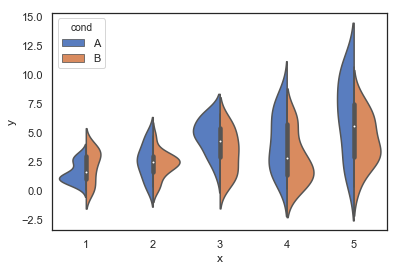

In [16]:
sns.violinplot(x='x', y='y', hue='cond', split=True, data=df3)

Like previously:
    
- The white dot represents the **median**.
- The thick black line is the **$IQR$**.
- Each *violin* spans the **whole** range of values of the subset.
- The shape of the violin is the **KDE** of the underlying distribution of the subset.

`sns.violinplot` documentation can be found [here](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

A more extensive tutorial on plotting categorical data with seaborn can be found [here](https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial)

### Visualizing the relationship between two discrete variables

One way of visualizing the relationship between two discrete variables, is through a **heatmap**. A heatmap is essentially a color-coded 2-dimensional matrix. Heatmaps can be done with categorical data, but work best with ordinal variables, as it provides spatial information.

This is done with [`sns.heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

```python
sns.heatmap(data)
```

Heatmaps are different than the other seaborn functions we've seen up till now in that they require the 2D array to be passed as an argument in order to work. 

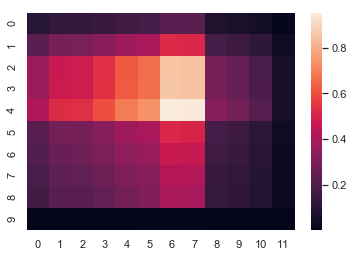

In [17]:
# Create heatmap data. We want the highest values to be near the center and the lowest near the edges.
np.random.seed(8)
# Create 10 columns the first 5 with random ascending values the last 5 with descending
cols = np.r_[np.sort(np.random.random(5)).reshape(-1, 1), np.sort(np.random.random(5)).reshape(-1, 1)[::-1]]
# Create 12 rows in the same fashion
rows = np.r_[np.sort(np.random.random(6)), np.sort(np.random.random(6))[::-1]]
# Let numpy's broadcasting do the trick to populate the 2D array.
data = cols * rows

sns.heatmap(cols * rows)

Obviously, this way isn't very helpful, as we must construct the full 2D array ourselves. Pandas' [pivot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html) can make our life easier.

In [18]:
# Create a DataFrame containing monthly revenues during a 10-year span
np.random.seed(9)
month_trend = np.r_[np.sort(np.random.random(6)).reshape(-1, 1), np.sort(np.random.random(6)).reshape(-1, 1)[::-1]]
months = ['January', 'Febuary', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
year_trend = np.sort(np.random.random(20))
years = range(1999, 2019)

revenue = month_trend * year_trend * 10000
month_col = np.repeat(months, len(years))
year_col = np.tile(years, len(months))

df4 = pd.DataFrame({'Month': month_col, 'Year': year_col, 'Revenue': revenue.ravel().astype(int)})

print(df4.shape)
df4.sample(5)

(240, 3)


,Month,Revenue,Year
190,October,1734,2009
201,November,282,2000
196,October,2333,2015
104,June,2615,2003
166,September,1978,2005


We can easily turn this into a 2D array through the `pd.DataFrame.pivot()` method.

In [19]:
df4.pivot('Month', 'Year', 'Revenue')

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Month,,,,,,,,,,,,,,,,,,,,
April,84,370,844,1017,1138,1197,1251,1419,1457,1517,1527,1535,1756,1802,1881,1962,2055,2066,2078,2149
August,162,709,1617,1948,2180,2292,2397,2718,2791,2906,2925,2939,3363,3452,3602,3758,3936,3957,3979,4115
December,32,142,324,391,438,460,481,546,560,583,587,590,675,693,723,754,790,794,799,826
Febuary,51,227,517,623,697,733,766,869,892,929,935,940,1075,1103,1152,1201,1258,1265,1272,1316
January,4,17,40,48,54,56,59,67,69,72,72,72,83,85,89,93,97,98,98,102
July,340,1490,3395,4091,4578,4813,5032,5706,5859,6101,6142,6171,7061,7246,7562,7889,8263,8306,8354,8639
June,194,851,1939,2337,2615,2749,2874,3259,3346,3485,3508,3525,4033,4139,4320,4506,4720,4745,4772,4935
March,55,241,549,661,740,778,813,923,947,986,993,998,1142,1172,1223,1276,1336,1343,1351,1397
May,192,841,1916,2308,2583,2716,2839,3220,3306,3442,3465,3482,3984,4089,4267,4452,4662,4687,4714,4875


This pivot is almost what we need; the only problem is that the months are not sorted. However, in order to benefit from the ordinal nature of the `Month` variable and consequently from the spatial nature of the heatmap, we should order the months properly.

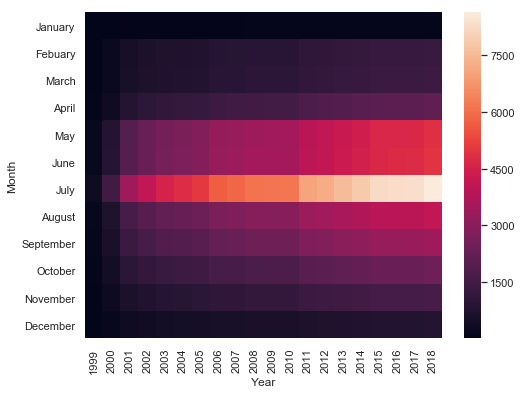

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(df4.pivot('Month', 'Year', 'Revenue').reindex(months, axis=0))

Heatmaps are useful for these situations, because its spatial nature can convey a lot of information. For instance, from the heatmap above we can deduce that almost all revenue comes from summer months and the revenue raises steadily from year to year.

Another common use of heatmaps is to visualize the correlations between variables. We'll see an example later.

### Final remarks

Seaborn introduces a nice way of creating nice plots with relative ease. The fact that it is built on top of matplotlib, gives us a lot of freedom in customizing any of the plots, however we want.

Of course, the types of plots we covered are only few of the many seaborn functions. An easy way of discovering the capabilities of this library is through seaborn's [example gallery](https://seaborn.pydata.org/examples/index.html).

Another, very useful resource covering both matplotlib and seaborn examples is the [Python graph gallery](https://python-graph-gallery.com/). From this site you can find examples of any plot you can imagine, along with tips on using them.

Now that we've gone showcasing several of matplotlib and seaborn's capabilities, it's time we use them in practice.

# Exploratory Data Analysis

In a previous tutorial we saw how we can perform EDA with the pandas library. However, EDA isn't complete unless we can visualize our data. First, let's see an example of **why** data visualization in necessary in EDA. The data we are going to use are called the [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).

> Anscombe's quartet comprises four datasets that have nearly identical simple descriptive statistics, yet appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers on statistical properties.

In [21]:
quartet = sns.load_dataset('anscombe')

# create new columns for statistical descriptions
for num in quartet.dataset.unique():
    quartet[str(num) + 'x'] = quartet[quartet.dataset == str(num)].x
    quartet[str(num) + 'y'] = quartet[quartet.dataset == str(num)].y

Let's try to describe these four different datasets, using **just** their statistical characteristics:

In [22]:
quartet.loc[:, ['Ix', 'IIx', 'IIIx', 'IVx']].describe()

,Ix,IIx,IIIx,IVx
count,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,9.000000,9.000000
std,3.316625,3.316625,3.316625,3.316625
min,4.000000,4.000000,4.000000,8.000000
25%,6.500000,6.500000,6.500000,8.000000
50%,9.000000,9.000000,9.000000,8.000000
75%,11.500000,11.500000,11.500000,8.000000
max,14.000000,14.000000,14.000000,19.000000


In [23]:
quartet.loc[:, ['Iy', 'IIy', 'IIIy', 'IVy']].describe()

,Iy,IIy,IIIy,IVy
count,11.000000,11.000000,11.000000,11.000000
mean,7.500909,7.500909,7.500000,7.500909
std,2.031568,2.031657,2.030424,2.030579
min,4.260000,3.100000,5.390000,5.250000
25%,6.315000,6.695000,6.250000,6.170000
50%,7.580000,8.140000,7.110000,7.040000
75%,8.570000,8.950000,7.980000,8.190000
max,10.840000,9.260000,12.740000,12.500000


These four datasets share virtually the same basic statistical characteristics, but if we plot them, we'll see that they are indeed very different.

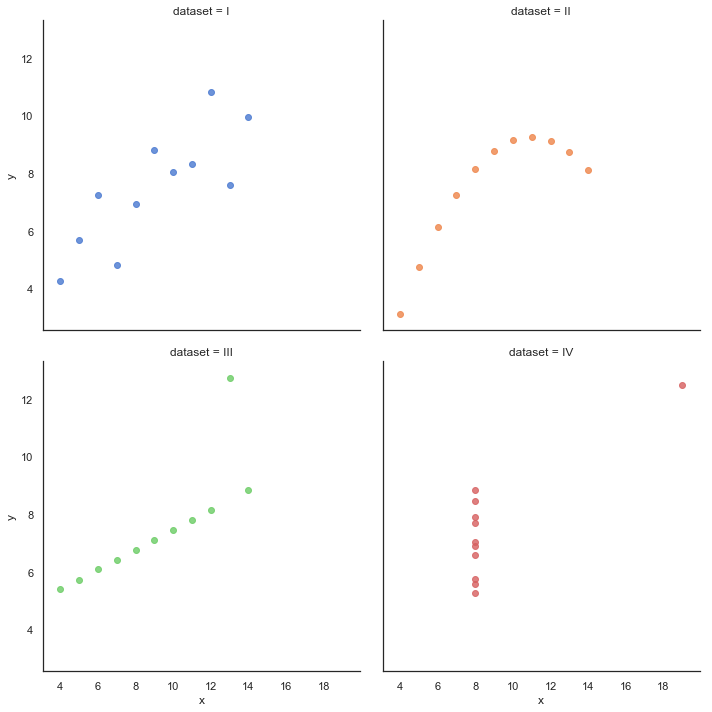

In [24]:
sns.lmplot(x='x', y='y', col='dataset', hue='dataset', data=quartet, col_wrap=2, fit_reg=False)

This is an extreme example, but it shows that we can't rely solely on descriptive statistics when performing an EDA, as it can sometimes mislead us. We can gain a lot of insight by visualizing our data!

Let's continue to our main EDA example. While we won't perform an extensive EDA covering every variable, we'll instead view a few distributions and associations to see how they can be visualized in practice. First, we'll import a [dataset](http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names) describing automobile sales.

In [25]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', header=None)

df.columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
              'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 
              'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
              'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Remove NaN values:
df = df.applymap(lambda x: x if '?' not in str(x) else np.nan)
df = df.dropna()

print(df.shape)
df.head()

(159, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


When dealing with **continuous** (numerical) variables, a good practice is to visualize their distribution. 

Average age: 9583.65%
Standard deviation: 3071.86%
Skewness: 91.67%
Kurtosis: 29.89%


Text(105.42,0.0153337,'mean')

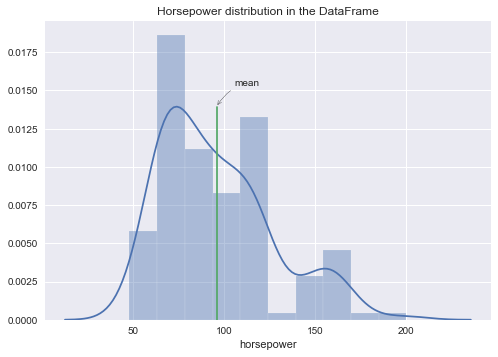

In [26]:
plt.style.use('seaborn')  # use different plot style
# Reminder: we can view available styles by: print(plt.style.available)

df.horsepower = df.horsepower.astype(int)  # cast column as integer

# Statistical information:
print('Average age: {:.2f}%'.format(df.horsepower.mean()*100))
print('Standard deviation: {:.2f}%'.format(df.horsepower.std()*100))
print('Skewness: {:.2f}%'.format(df.horsepower.skew()*100))
print('Kurtosis: {:.2f}%'.format(df.horsepower.kurtosis()*100))

# Distplot:
ax = sns.distplot(df.horsepower)

# Auxiliary information:
mn = df.horsepower.mean()
mx = ax.lines[0].get_ydata().max()

# Plot median line:
ax.plot([mn]*2, [0, mx])

# Title:
ax.set_title('Horsepower distribution in the DataFrame')

# Annotation:
plt.annotate('mean', [mn, mx],  xytext=[mn*1.1, mx*1.1], fontsize=10,
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=.2', color='black'))

From the above plot we can easily see several of the properties of a specific variable, such as the positive skewness, the high number of samples between the 75-125 range, the low representation of the 130hp range, etc.

We can also view the association between two continuous variables through a regplot.

Correlation: 0.8120726263087286


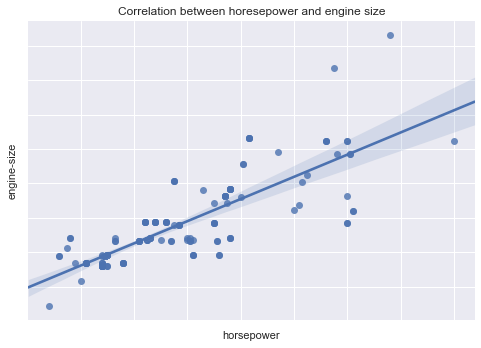

In [27]:
df['engine-size'] = df['engine-size'].astype(int)

# Plot:
ax = sns.regplot(x='horsepower', y='engine-size', data=df)
ax.set_xticklabels(['']*df.shape[0])  # remove axis labels
ax.set_yticklabels(['']*df.shape[0])
ax.set_title('Correlation between horesepower and engine size')

# Calculate correlation:
print('Correlation:', df.corr()['horsepower']['engine-size'])

The positive correlation between the two variables is apparent through this plot.

**Bonus**:

To view if the correlation is statistically significant we must run our own linear regression on these two variables.

In [28]:
import scipy

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df.horsepower, df['engine-size'])

print('r:', r_value)
print('p:', p_value)

r: 0.8120726263087285
p: 1.4699668393890564e-38


## Exercise 1:

Do the same thing as above for the pair `horsepower` - `price`. Determine if they are correlated.

## Solution:

Correlation: 0.7598739453801002


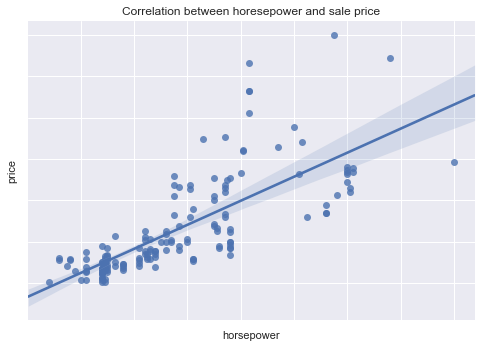

In [29]:
df.price = df.price.astype(int)  # we need to cast this as an int as well

ax = sns.regplot(x='horsepower', y='price', data=df)
ax.set_xticklabels(['']*df.shape[0])
ax.set_yticklabels(['']*df.shape[0])
ax.set_title('Correlation between horesepower and sale price')

print('Correlation:', df.corr()['horsepower']['price'])

When dealing with **categorical** variables. The first thing we want to do is to draw a bar plot, to view their distribution. This can be done either with matplotlib or seaborn. 

Text(0,0.5,'Number of samples')

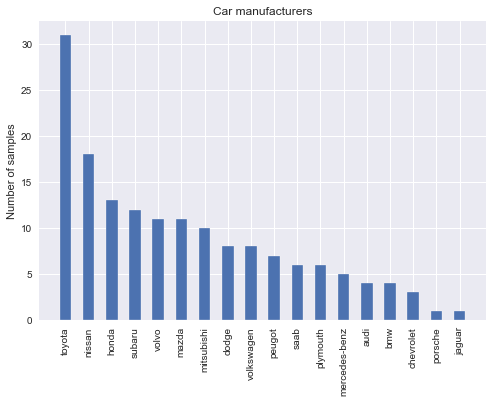

In [30]:
plt.bar(x=pd.value_counts(df.make).keys(), height=pd.value_counts(df.make), width=0.5)
plt.xticks(rotation='vertical')
plt.title('Car manufacturers')
plt.ylabel('Number of samples')

We can also see the association between a categorical and a continuous variable this way.

Text(0.5,1,'Price per car manufacturer')

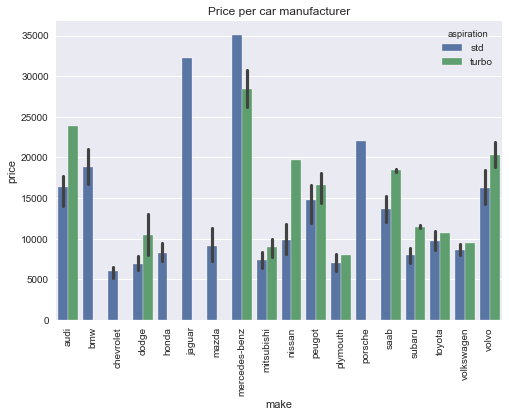

In [31]:
sns.barplot(x='make', y='price', hue='aspiration', data=df)
plt.xticks(rotation='vertical')
plt.title('Price per car manufacturer')

Through this plot the association of `make` and `price` becomes apparent. For example, we can easily see that Mercedes Benz and Jaguars are more expensive than Honda an Nissan cars, or that (besides Mercedes Benz, `turbo` are more expensive than standard aspired engines - `std`). 

Another excellent chart carrying a lot of information is the violinplot.

Text(0.5,1,'Price per body type')

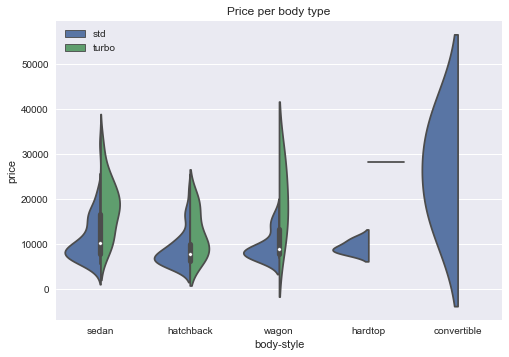

In [32]:
sns.violinplot(x='body-style', y='price', hue='aspiration', data=df, split=True)
plt.legend(loc='upper left')
plt.title('Price per body type')

Besides the information presented through the barplot, the violinplot also depicts the distribution of each variable. The two variables on the right are half, because we only have 1 and 0 samples for those categories.

Another very popular way to visualize a variable is the pie chart. This is typically used when wanting to visualize a comparison between each category and a total (e.g. the proportion of the number of samples each category has with the total number of samples). When wanting to compare variables with each other it's best to use a bar plot.

Text(0.5,1,'Number of cylinders')

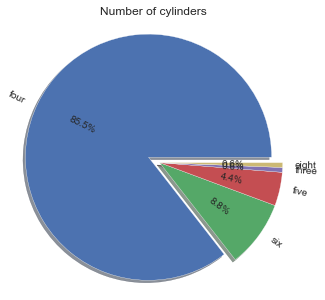

In [33]:
labels = pd.value_counts(df['num-of-cylinders']).keys()
sizes = pd.value_counts(df['num-of-cylinders'])

# Explode the most frequent category:
explode = [0] * len(sizes)
explode[np.argmax(list(sizes))] = 0.1

plt.figure(figsize=(5, 5))

# Draw pie chart
properties = plt.pie(sizes, labels=labels, explode=explode, shadow=True, startangle=0, autopct='%1.1f%%')

# Rotate labels:
# [0] = wedges, [1] = labels, [2] = fractions
for i in range(len(properties[0])):
    angle = (properties[0][i].theta2 + properties[0][i].theta1) / 2  # find angle in the position of the label
    if angle < 180:  # rotate upside down labels
        angle = angle - 180
    properties[1][i].set_rotation(angle)  # set label rotation
    properties[2][i].set_rotation(angle)  # set fraction rotation
    
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Number of cylinders')

The clear dominance of four cylinders is visible through the pie chart.

We can also compare two **discrete variables**. 

Say we want to visualize the proportion of cars with two doors to those with four, for each car manufacturer.

We'll use a different kind of plot to visualize this. Rather than a standard bar plot, we'll create a stacked bar plot where each bar reaches a total height of 1. The relative size between the lower and upper bars will show us the relationship we described.

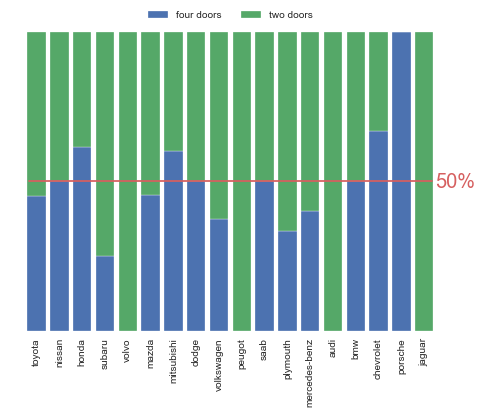

In [34]:
d = pd.value_counts(df.make)  # count the total number of samples each car manufacturer has
d2 = pd.value_counts(df[df['num-of-doors'] == 'two'].make)  # count the number of samples for cars with two doors
d2 /= d  # normalize to [0, 1]
d2 = d2[d.keys()].fillna(0)  # get all categories and fill missing ones with 0
d4 = pd.value_counts(df[df['num-of-doors'] == 'four'].make)  # count the number of samples for cars with four doors
d4 /= d
d4 = d4[d.keys()].fillna(0)

plt.bar(d2.keys(), d2, label='four doors')
plt.bar(d4.keys(), d4, bottom=d2, label='two doors')  # stack the second bar plot on top of the first

plt.plot([-0.35, 17.35], [0.5, 0.5], c='r') # add horizontal line right in the middle
plt.text(17.5, 0.48, '50%', color='r', fontsize=20) # add text

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)  # place the legend outside the plot
plt.xticks(rotation='vertical')

ax = plt.gca()
ax.set_facecolor('white')  # make the background white
ax.get_yaxis().set_visible(False)  # remove y axis

We can also visualize the relative price of two and four doored cars, for each manufacturer. This time we'll make the bars horizontal. We'll do this one a bit more conventionally.

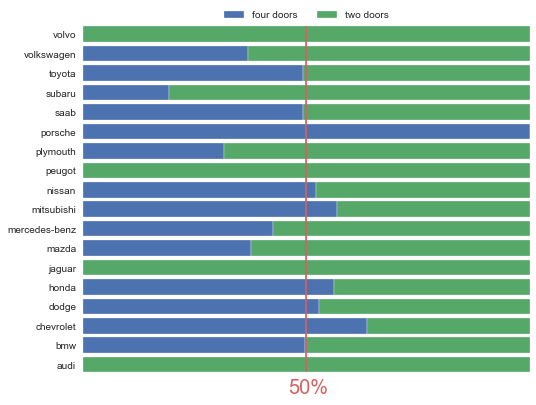

In [35]:
# Define figure
plt.figure(figsize=(8, 7))

# Create a pivot table with the car manufacturer as its rows, the number of doors as its columns and the
# total price of the cars in each sub-category as its values. Categories with no samples are filled with 0. 
dd = pd.pivot_table(df, values='price', index='make', columns='num-of-doors', aggfunc='sum').fillna(0)

# Normalize each of the manufacturer categories to [0, 1]
d2 = dd['two'] / dd.sum(axis=1)
d4 = dd['four'] / dd.sum(axis=1)

# Create a subplot
ax = plt.subplot(111)

# Draw the two barplots, stacked next to each other
ax.barh(d2.keys(), d2, label='four doors')
ax.barh(d4.keys(), d4, left=d2, label='two doors')

# Draw a vertical line at the middle and text
plt.plot([0.5, 0.5], [-0.35, 17.35], c='r')
plt.text(0.46, -1.5, '50%', color='r', fontsize=20)

# Create a legend outside of the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=2)

# Change background to white
ax.set_facecolor('white')

# Remove x-axis completely
ax.get_xaxis().set_visible(False)

Another way to visualize the same thing is through a heatmap.

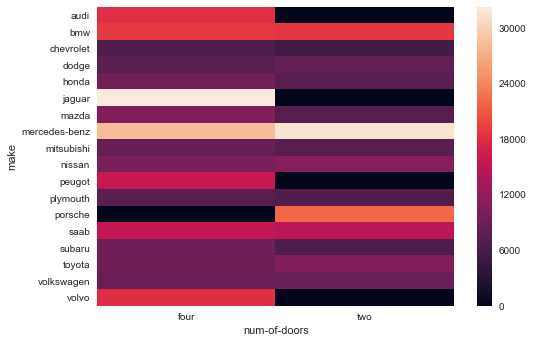

In [36]:
# Do the same thing as before without normalization.

# Unfortunately we can't do it the easy way: df.pivot('make', 'num-of-doors', 'price')
# because df.pivot() doesn't support data aggregation

# Use pd.pivot_table() with mean aggrigation
dd = pd.pivot_table(df, values='price', index='make', columns='num-of-doors', aggfunc='mean').fillna(0)  

sns.heatmap(dd)

If we have multiple variables we want plotted in pairs, we can generate a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

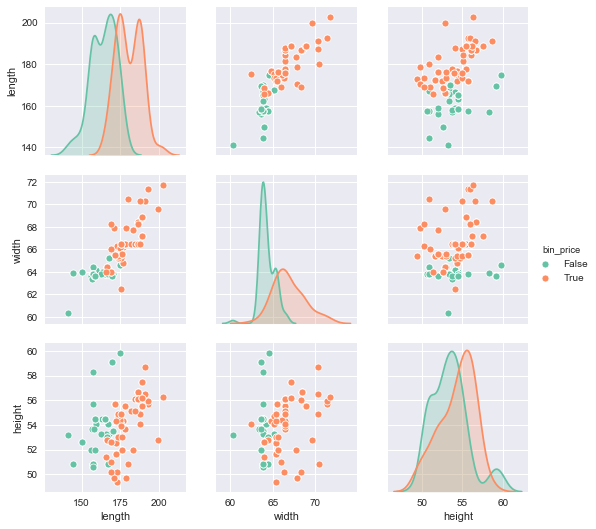

In [37]:
df['bin_price'] = df.price > df.price.median()
sns.pairplot(df, x_vars=['length', 'width', 'height'], y_vars=['length', 'width', 'height'],
             hue='bin_price', diag_kind='kde', palette='Set2')

We won't go into much detail about these plots as their use is not as common as the previous. These can be used when our dataset contains a limited number of variables and we want to view the relationship between them and how they relate to the target variable.

For example, for the iris dataset:

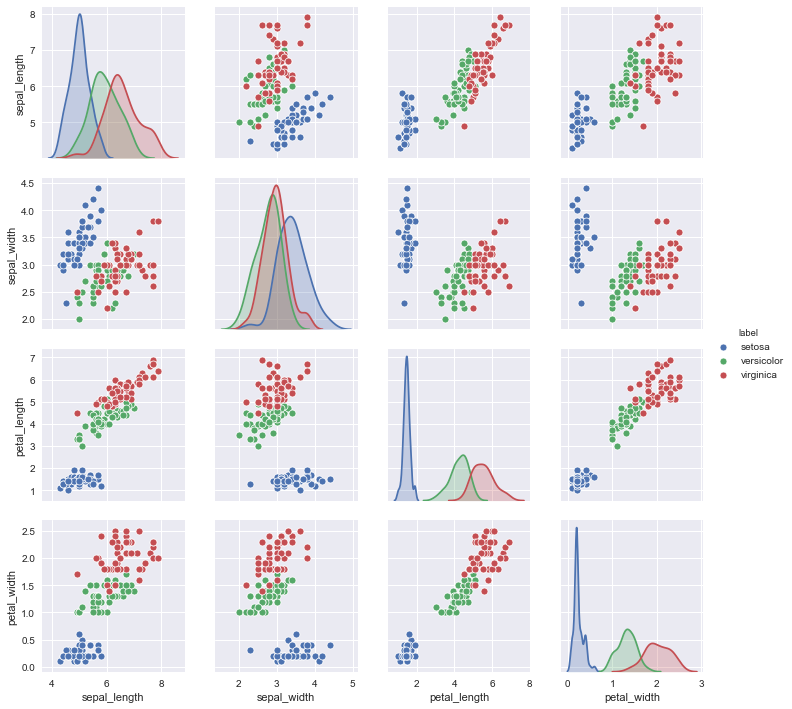

In [38]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(url, header=None)
iris.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
iris.label = iris.label.map(lambda x: x.replace('Iris-', ''))
sns.pairplot(iris, hue='label')